# Clase 3: SciPy
---
## ¿Qué es SciPy?
* Scipy es un conjunto de algoritmos matematicos y funciones de utilidad construidas en Numpy, como una extensión de Python.
* Empleandolas podemos acelerar la escritura de nuestro código y el entendimiento de las funcionas al desglosarlas.
* El uso de Scipy para procesamiento de datos y prototipado de sistemas permite un entorno que compite con el presentado en MATLAB, IDL, Octave, R-Lab y SciLab.
* En general, de aquí en adelante se supondra que las paqueterias (numpy, scipy y matplotlib) serán importadas de la siguiente forma:

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


## ¿Qué incluye SciPy?
A continuación se enlistan las subpaqueterias que incluye Scipy. 

Remarcaremos aquellas que se consideran de interes para el curso.

|Subpaqueteria|	Descripción 
|---|---|
|cluster	|Clustering algorithms|
|constants	|Physical and mathematical constants|
|fftpack	|Fast Fourier Transform routines|
|integrate	|Integration and ordinary differential equation solvers|
|interpolate|Interpolation and smoothing splines|
|io	        |Input and Output|
|linalg	    |Linear algebra|
|ndimage    |N-dimensional image processing|
|odr	    |Orthogonal distance regression|
|optimize   |Optimization and root-finding routines|
|signal	    |Signal processing|
|sparse	    |Sparse matrices and associated routines|
|spatial    |Spatial data structures and algorithms|
|special    |Special functions|
|stats	    |Statistical distributions and functions|

Es necesario considerar que al llamar cada subpaquetería lo haremos por separado, por ejemplo:


In [2]:
from scipy import linalg, optimize

Respecto a la instalación, se seguirán los siguentes comandos:
>conda install scipy

>conda install -c anaconda scipy 

Para profundizar sobre scipy se dejan los siguientes enlaces de interes:

https://scipy.org/index.html

https://scipy.org/install.html

## Funciones Básicas
---
### Atajos de Indexado
A continuación se verán las funciones:

*np.mgrid , np.ogrid , np.r_ , np.c*

que nos permiten indexar más cómodamente arreglos de Numpy

In [3]:
# La sentencia
a = np.concatenate(([3], [0]*5, np.arange(-1, 1.002, 2/9.0)))
# Equivale a
print("Primer resultado de a:\n", a)
a = np.r_[3,[0]*5,-1:1:10j]
b=np.c_[-1:1:10j]
print("\n Resultados de a y b con concatenadores a:\n",a)
print("\n b:", b)


Primer resultado de a:
 [ 3.          0.          0.          0.          0.          0.
 -1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]

 Resultados de a y b con concatenadores a:
 [ 3.          0.          0.          0.          0.          0.
 -1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]

 b: [[-1.        ]
 [-0.77777778]
 [-0.55555556]
 [-0.33333333]
 [-0.11111111]
 [ 0.11111111]
 [ 0.33333333]
 [ 0.55555556]
 [ 0.77777778]
 [ 1.        ]]


Dónde .r_ hace referencia a la palabra en inglés "row", concatenador de filas. 

De la misma forma tenemos .c_ , concatenador de columnas.

En cuanto .mgrid y .ogrid retornan arreglos n-dimensionales con todos sus elementos de la misma dimensión y con una dimensión diferente a 1 respectivamente.

In [72]:
#np.mgrid[0:2,0:3]  #Dimensiones combinadas, 2 elementos de 2x3
#np.mgrid[0:1,0:3,0:2] #Dimensiones combinadas, 3 elementos de 1x2x3
#np.mgrid[0:1,0:2,0:3] #Dimensiones combinadas, 3 elementos de 1x3x2
np.mgrid[0:1,0:1,0:1,0:1] #Dimensiones combinadas, 4 elementos de 1x1x1x1


array([[[[[0]]]],



       [[[[0]]]],



       [[[[0]]]],



       [[[[0]]]]])

In [75]:
np.ogrid[0:4,0:3] #Arreglo de 1 fila de 4, 1 columna de 3. [agregar más elementos aumenta la dimensionalidad]

[array([[0],
        [1],
        [2],
        [3]]), array([[0, 1, 2]])]

### Polinomios
La paquetería "poly1d" nos permite trabajar con una variable simbolica que arroja una ecuación polinomial. A la cual le ingresamos los coeficientes polinomiales.

Esta ecuación puede ser integrada, derivada y evaluada.
Además, es posible realizar algebra de polinomios siempre y cuando se cumplan las propiedades requeridas.

In [6]:
p = np.poly1d([3, -5, 5])
print(p)
#Evaluar
p(2)

   2
3 x - 5 x + 5


7

In [7]:
#Encontrar raices
print(p.r)
p(p.r)

[0.83333333+0.9860133j 0.83333333-0.9860133j]


array([1.77635684e-15+0.j, 1.77635684e-15+0.j])

In [8]:
#Retorno de coeficientes, derivación e integración
print("\n",p.c)
print("\n",p.deriv())
print("\n",p.integ())
p.order


 [ 3 -5  5]

  
6 x - 5

    3       2
1 x - 2.5 x + 5 x


2

### Miscelaneas 
* linspace
* logspace
* angle
* absolute
* factorial
* comb

In [79]:
A = np.linspace(0.0, 3.0, num=5)
B = np.logspace(0.0, 3.0, num=5)
C = np.logspace(0.0, 3.0, num=5,base=2.0)
print ("Arreglos lineales y logaritmicos: \n", A)
print ("\n",B)
print ("\n",C)
a = np.angle(1+1j)
b = np.angle(1+1j, deg=True)  
print ("\nResultados de la operación angulo: \n", a,b)

a = np.absolute(1+1j)
print("\nResultados de la operación absoluto: \n",a)

x = np.arange(9.).reshape(3, 3)
c = np.where( x > 4 )
print(x)
print("\nResultado de la busqueda:\n",c) #Tipo de dato
print(x[np.where(x>4)])                  #Resultado siempre vector
d=np.where(x < 5, x, -1)                   #Aquello que no cumpla es sustituido por el elemento señalado
print("\nResultado de la busqueda: \n",d)

from scipy.special import factorial as fac
#exact hace referencia a utilizar flotante o no en la precisión del resultado
a=fac(4) 
b=fac(3.4)
print("Resultados de la operación factorial:",a,b)
 

Arreglos lineales y logaritmicos: 
 [0.   0.75 1.5  2.25 3.  ]

 [   1.            5.62341325   31.6227766   177.827941   1000.        ]

 [1.         1.68179283 2.82842712 4.75682846 8.        ]

Resultados de la operación angulo: 
 0.7853981633974483 45.0

Resultados de la operación absoluto: 
 1.4142135623730951
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]

Resultado de la busqueda:
 (array([1, 2, 2, 2], dtype=int64), array([2, 0, 1, 2], dtype=int64))
[5. 6. 7. 8.]

Resultado de la busqueda: 
 [[ 0.  1.  2.]
 [ 3.  4. -1.]
 [-1. -1. -1.]]
Resultados de la operación factorial: 24.0 10.136101851155138


$n!=\Gamma(n+1)=\int_0^\infty{x^{n}}e^{-x}dx$

In [81]:
from scipy.special import comb

a=comb(10, 3, exact=True)
b=comb(10, 3.2, exact=False, repetition=True)
print("Resultado de combinatorias: \n",a,b)

Resultado de combinatorias: 
 120 282.4837643263993


$ C^n_k =\binom{n}{k} = \dfrac{n!}{k!(n-k)!} \ \ y \ \  CR^n_k = \binom{n+k-1}{k}= \dfrac{(n+k-1)!}{k!(n-k)!}$

## Funciones especiales
---
Paquetería con ciertas funciones especiales.

Importación común:
>from scipy import special

>import scipy.special as sc
 
Incluye las siguientes clasificaciones de funciones:
* Error handling
* Airy functions: $y''(x)=xy(x)$
* Elliptic Functions and Integrals: $K(m)=\int_{0}^{\pi/2}[1-m \sin(t)^2]^{-1/2} dt$
* Bessel Functions: $x^2\dfrac{d^2 y}{d x^2}+x\dfrac{dy}{dx}+(x^2-\alpha^2)y=0$
* Sturve Functions: $H_v(x)=(z/2)^{v+1}\Sigma_{n=0}^{\infty}\dfrac{(-1)^n(z/2)^{2n}}{\Gamma(n+\dfrac{3}{2})\Gamma(n+v+\dfrac{3}{2})}$
* Raw Statistical Functions (Funciones de distribusión y distribusión acumulada, entre funciones de interés estádistico)
* Information Theory Functions (entropia computacional, etc)
* Gamma and Related Functions $\Gamma$
* ETC (Otras 13 categorias)

Se puede encontrar un sumario de las funciones en: 

https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special

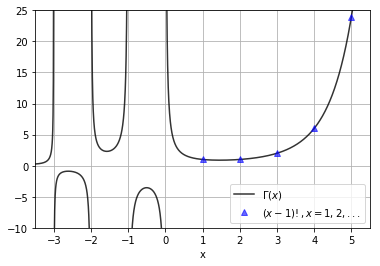

In [11]:
#Uso de la función gamma y factorial
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma,factorial 

x = np.linspace(-3.5, 5.5, 2251)
y = gamma(x)

plt.plot(x, y, 'K', alpha=0.8, label='$\Gamma(x)$')
k = np.arange(1, 7)
plt.plot(k, factorial(k-1), 'b^', alpha=0.6,label='$(x-1)!, x = 1, 2, ...$')
plt.xlim(-3.5, 5.5)
plt.ylim(-10, 25)
plt.grid()
plt.xlabel('x')
plt.legend(loc='lower right')
plt.show()

## Integracion
---
Paquetería dedicada a la integración númerica así como integrales relacionadas a ecuaciones diferenciales de primer orden.


In [12]:
from scipy import integrate
#help(integrate)


#### quad
Integración númerica de una integral definida, esta puede ser una integral impropia

In [13]:
# Intrgración mediante quad
import numpy as np
import scipy.integrate as integrate
x2 = lambda x: x**2
r1 = integrate.quad(x2, 0, 4.5)

x3 = lambda x: np.exp(-x)
r2 = integrate.quad(x3,0, np.inf)

x4 = lambda x: np.exp(-(x**2))
r3 = integrate.quad(x4,-np.inf,np.inf)

print("\n", r1)

print("\n", r2 )

print("\n", r3 )


 (30.375, 3.372302437298913e-13)

 (1.0000000000000002, 5.842606996763696e-11)

 (1.7724538509055159, 1.4202636781830878e-08)


In [14]:
np.sqrt(np.pi)

1.7724538509055159


$$ \int_{0}^{4.5}{x^2} dx \ \ \ \ , \ \ \ \ \int_{0}^{\infty}{e^{-x}} dx \ \ \ \ , \ \ \ \ \int_{-\infty}^{\infty}{e^{-x^{2}}} dx $$
 
## Operador lambda $\lambda$
 
El operador/función lambda crea pequeñas funciones anonimas, es decir, funciones sin nombre. De forma que estas funciones serán empleadas solo dentro de una función y no otra vez. 
Su funcionamiento es equivalente a la creación de multiples variables simbolicas y la operación a realizar entre ellas.
Su empleo general es:
> lambda lista_de_argumentos: expresion

Aunque también es posible asignarle un nombre a nuestra función para emplearla más adelante y evaluarla nuevamente. 

In [106]:
import numpy as np
Fun = lambda x,y,z: x**2+y**2-2*x*y*np.cos(z)
print (Fun(1,2,0))

#Ejemplo de uso único
Celsius = [39.2, 36.5, 37.3, 37.8]
Fahrenheit = map(lambda x: (float(9)/5)*x + 32, Celsius)
print(Fahrenheit)


1.0


#### dblquad y tplquad 
funciones que sirven para integrar sobre 4 y 6 argumentos, respectivamente. 

Los límites de las integrales internas deben ser declarados como funciones

In [16]:
from scipy.integrate import quad, dblquad
def Inte(n):
    return dblquad(lambda x, y: n*x*y, 0, 0.5, 
                   lambda x: 0, 
                   lambda x: 1-2*x)
Inte(1)

(0.010416666666666668, 4.101620128472366e-16)

$$\int_{y=0}^{1/2}{\int_{x=0}^{1-2x}{nxy \ dx \ dy}} = n \dfrac{1}{96}$$

Como se intuye, dblquad tiene los argumentos:

dblquad("función",'limite inferior 1', 'limite superior 1','limite inferior 2', 'limite superior 2') 

de forma que cada vez son más internos los limites.

La función tplquad funciona analogamente para integrales triples.

#### nquad
Función que sirve para n-integrales iteradas, a diferencia de las anteriores su estructura es:
>integrate.nquad(funcion, [[limites más internos],[limites cada vez más externos]])

Por ejemplo para la integral:
$$ I_n = \int_{1}^{\infty}{\int_{0}^{\infty}{\dfrac{e^{-xt}}{t^n}} } $$

In [17]:
import numpy as np
from scipy import integrate

N = 5
def f(t, x):
    return np.exp(-x*t) / t**N
integrate.nquad(f, [[1, np.inf],[0, np.inf]])

(0.2000000000189363, 1.3682975855986121e-08)

#### Ecuaciones diferenciales ordinarias [odeint]
En este caso, la función odeint nos permitirá integrar un conjunto de ecuaciones ordinarias diferenciales dadas sus condiciones iniciales. De forma general tenemos:
$$ \dfrac{d \textbf{y}}{dt} = \textbf{f}(\textbf{y},t); \ \ \ con \ \ \ \textbf{y}(0)=y_0 \ \ \ considerando: $$
$ \textbf{y}, $
vector de N elementos.
$\textbf{f}, $
funcion que mapea de $ \textbf{R}^n$  a $ \textbf{R}^n $

Aplicando esto al problema del pendulo simple de ecuación: 
$$ \theta''(t) + b*\theta'(t) + c* \sin{( \theta(t) )}=0 $$

Podemos reescribir el sistema como:
$$\theta'(t) = \omega(t) $$
$$\omega'(t) = -b*\omega(t) -c*\sin{( \theta(t))}  $$

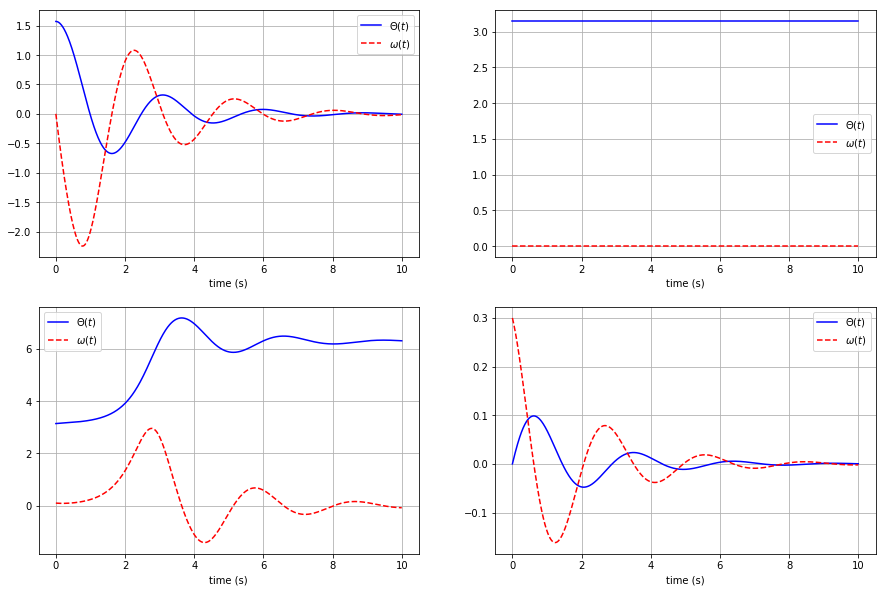

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def pend(y, t, b, c): #Declaración de simbolicas
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt
#Variables númericas del modelo
b=1;
c=5;
#Declaración de condiciones iniciales
y01 = [np.pi/2, 0.0]     
y02 = [np.pi, 0.0] #Eq. Inestable
y03 = [np.pi, 0.1] #Eq. Inestable     
y04 = [0.0 , 0.3]  #Eq. Estable   
y0=[y01,y02,y03,y04];
#Declaración del tiempo base para la solución
t = np.linspace(0, 10, 1001) #10 segundos de simulación, con 1001 divisiones

#Ejecutar odeint
m=0;
plt.figure(figsize=(15,10))
for i in y0:
    
    sol = odeint(pend, i, t, args=(b, c)) 
    #Argumentos: Función simbolica, Condiciones iniciales, Tiempo de solución, argumentos internos
    m=m+1;
    plt.subplot(2,2,m)
    plt.plot(t, sol[:, 0], 'b', label='$\Theta(t)$')
    plt.plot(t, sol[:, 1], 'r--', label='$\omega(t)$')

    plt.legend(loc='best') #Localización automatica
    plt.xlabel('time (s)')   
    plt.grid()
    
plt.show()

La paquetería integral posee más funciones y elementos de útilidad, debido a que su matemática trasciende a lo esperado en este curso no serán contempladas.

Se recomienda a los asistentes revisar la paquetaría directamente en: https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate

## Interpolar
---
La interpolación se define como obtener información caracteristica de una curva n-dimensional partiendo de los datos y caracteristicas propias de la curva. El calculo y los métodos suelen ser númericos y tratan de ajustar un cierto error o variable de control.

Empezando con la clase "interp1d" que sirve para interpolar curvas de una dimensión a partir de un vector de datos

Dada una curva $y=f(x)$
> interp1d(x,y,'kind','axis','assume_sorted')

* kind: (‘linear’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, ‘next’)
* axis: (respecto a que eje va a interpolar, default 'y')
* assume_sorted : (True/False) Asume o no que los valores están ordenados de forma creciente, sino entonces los ordena

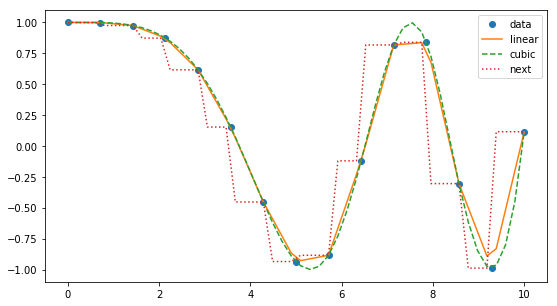

In [19]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x  = np.linspace(0, 10, num=15) 
y  = np.cos(-x**2/9.0)
f  = interp1d(x, y)  
f2 = interp1d(x, y, kind='cubic') #Declaración de clases como funciones
f3 = interp1d(x, y, kind='next')  

xnew = np.linspace(0, 10, num=50) #Resolución objetivo

plt.figure(figsize=(9,5))
plt.plot(x, y, 'o', 
         xnew, f(xnew), '-', 
         xnew, f2(xnew), '--', 
         xnew, f3(xnew),':')

plt.legend(['data', 'linear', 'cubic', 'next'], loc='best')
plt.show()

Para la interpolación multivariable o n-dimensional necesitamos los valores a interpolar en el respectivo arreglo matricial.

Así como definir la resolución de la interpolación de salida que buscamos.

La clase a emplear es 'griddata'

>griddata()

* Lista de argumentos*

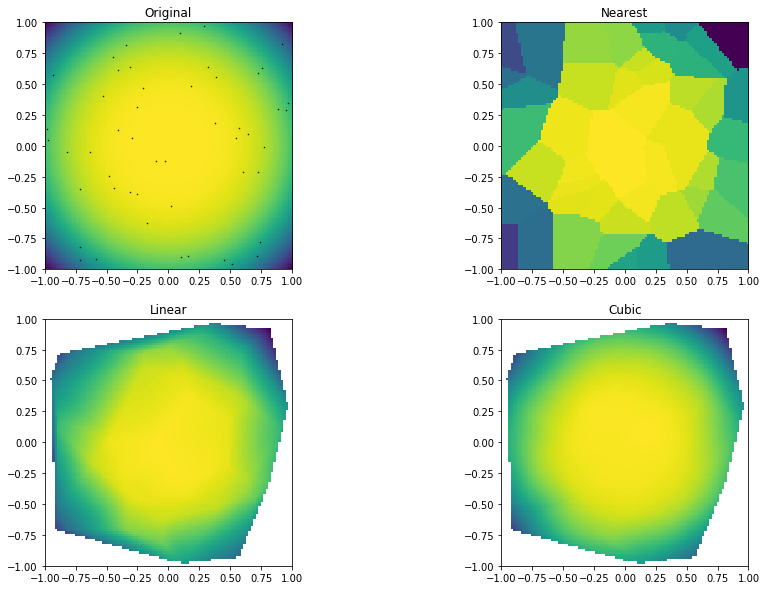

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def func(x, y):
      return np.sin(x**2+y**2)/(x**2+y**2)

grid_x, grid_y = np.mgrid[-1:1:100j, -1:1:100j] #Declaración de la grid, con resolución de 100*100

points = 2*(np.random.rand(50, 2)-0.5)
values = func(points[:,0], points[:,1])

#Métodos provados: near, linear, cubic

grid_Or = func(grid_x, grid_y) #Función evaluada
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')
# One can see that the exact result is reproduced by all of the methods to some degree,
# but for this smooth function the piecewise cubic interpolant gives the best results:

plt.figure(figsize=(15,10))
methods = ['Original','Nearest','Linear','Cubic']
graphs  = [grid_Or,grid_z0,grid_z1,grid_z2]
count   = 1;
for i in methods:
    plt.subplot(2,2,count)
    plt.imshow(graphs[count-1], extent=(-1,1,-1,1), origin='lower')
    if(count==1): plt.plot(points[:,0], points[:,1], 'k.', ms=1)      #Colocar los puntos random sobre la primer figura
    plt.title(i)
    count=count+1
plt.show()

Interpolación por spline
---
Esta clase nos servirá para calcular derivadas de una trayectoria interpolada así como evaluar puntos sobre la misma.
> interpolate.splrep: representación de la interpolación

> interpolate.splev   : evaluación de la interpolación, permite obtener aproximacióndes de derivadas

> interpolate.splroot : raíces de la función interpolada

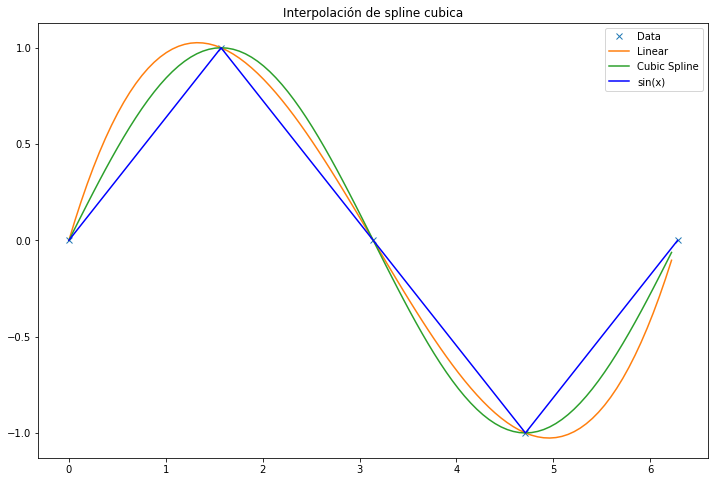

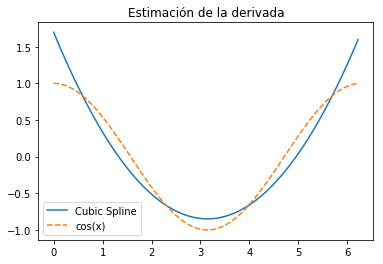

Raices: 
  [3.14159265 6.28318531]
Raices: 
  [-2.22044605e-16  3.14159265e+00  6.28318531e+00]


In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

#Spline cubic

x = np.arange(0, 2*np.pi+np.pi/4, np.pi/2)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0) # s: smoth, suavisa o no la función interpolada

xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

plt.figure(figsize=(12,8))
plt.plot(x, y, 'x',
         xnew, ynew,
         xnew, np.sin(xnew),
         x, y, 'b')
plt.legend(['Data', 'Linear', 'Cubic Spline', 'sin(x)'])
plt.title('Interpolación de spline cubica')
plt.show()

#Derivada

yder = interpolate.splev(xnew, tck, der=1)
plt.figure()
plt.plot(xnew, yder,
         xnew,np.cos(xnew),'--')
plt.legend(['Cubic Spline', 'cos(x)'])
plt.title('Estimación de la derivada')
plt.show()

A   = interpolate.sproot(tck)
    #Es necesario que las raices estén contenidad por ambos lados al momento de buscar sus raíces
x   = np.linspace(-np.pi/4, 2.*np.pi + np.pi/4, 21)
y   = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
B   = interpolate.sproot(tck)

print('Raices: \n ',A)
print('Raices: \n ',B)

## FT

La transformada de fourier, TF o FT en inglés; es una transformación lineal que lleva de un espacio temporal a un espacio frecuencial o de repeticiones/muestras. 

La teoría mátematica entorno a transformaciones lineales, transformada de fourier, discretización de la misma y su algoritmo de optimización se dejan de lado en este curso por motivos de tiempo.

Sin embargo se verá la transformada debido a su importancia en el analisis de datos, primordialmente para entender caracteristicas de una señal que no están presentes en su representación temporal.

La transformada de fourier se define como:
$$ F(\tau) = \int_{-\infty}^{\infty}f(x)e^{-2 \pi i x \tau} dx $$

Pero la transformada rápida de fourier FFT que es el algoritmo computacional discreto, se define como:
$$ y[k]= \Sigma_{n=0}^{N-1}e^{-2 \pi j x \tfrac{kn}{N}} x[n] $$

Las funciones relacionadas a esta transformación lineal se encuentran en la paquetería scipy.fftpack

#### fft / ifft


<img src='Class3D/FT.gif'>

C:\Users\DAYOF\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


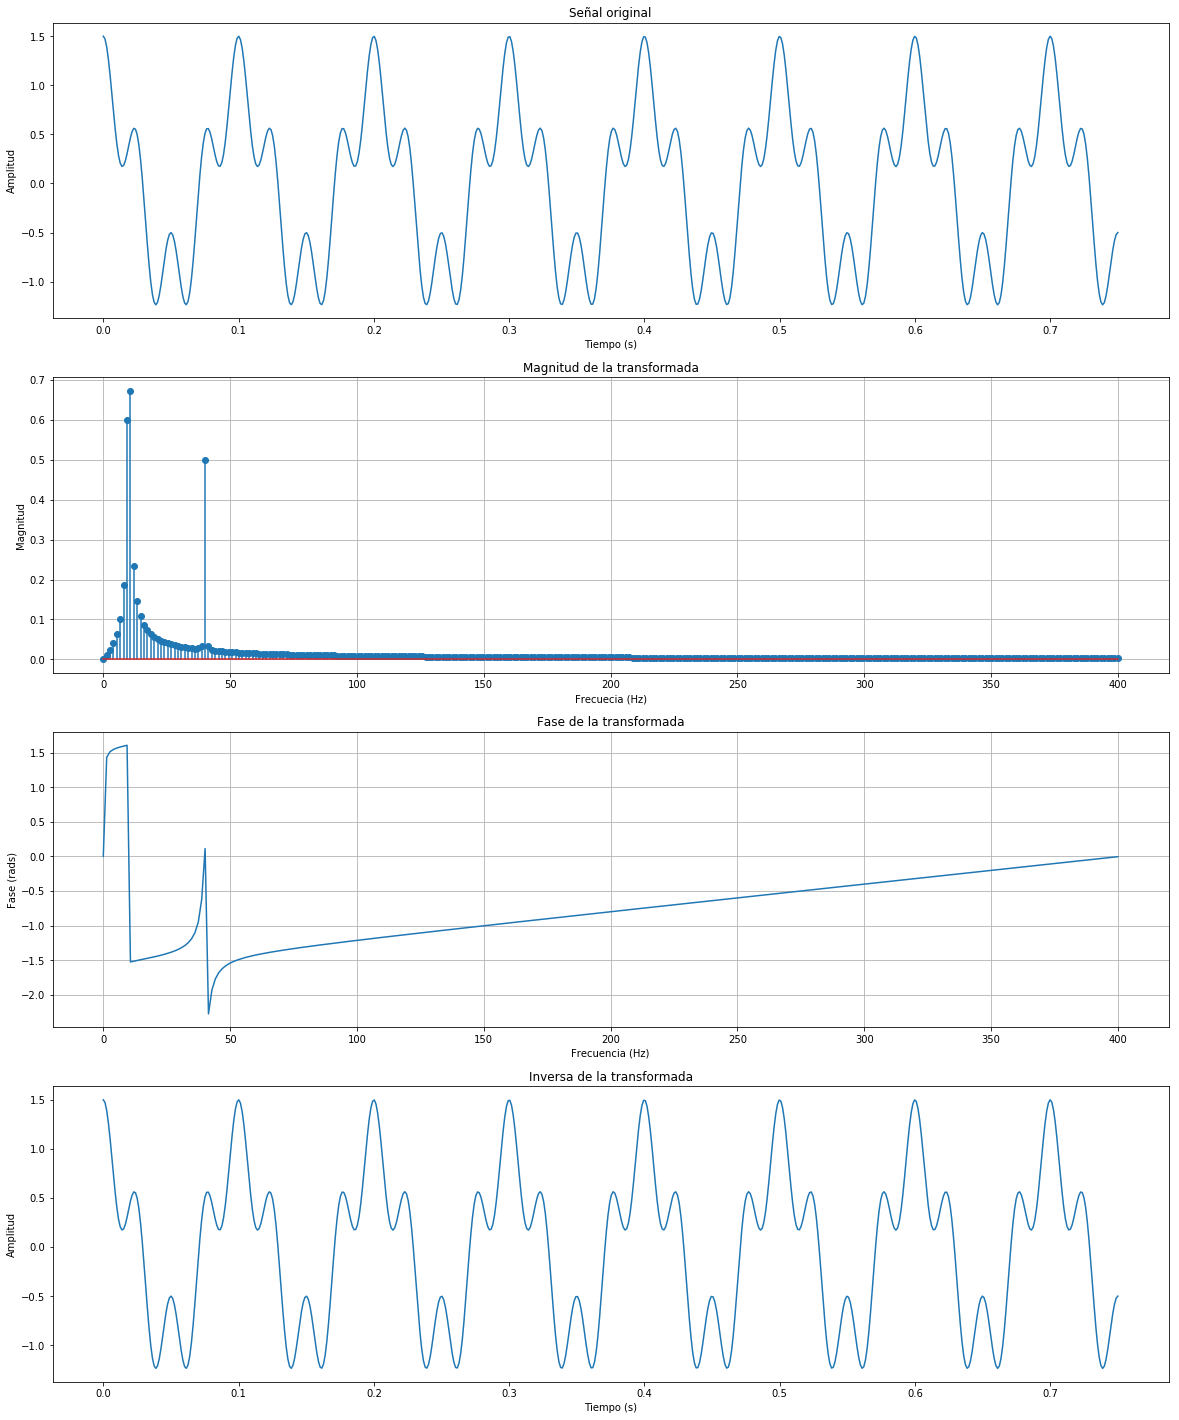

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft,ifft

N = 600 # Puntos
T = 1.0 / 800.0 #Periodo de muestreo / inv. Frecuencia de muestreo
x = np.linspace(0.0, N*T, N) # vector de tiempo de 1 seg

#Creación de señal del tipo: sin(2 Pi f t) 
y = np.cos(10.0 * 2.0*np.pi*x) + 0.5*np.cos(40.0 * 2.0*np.pi*x)
yf = fft(y) #Transformada

#Conversión del tiempo a espacio de frecuencias
#      frec=0 a N con intervalos de 1/(2T)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(20,25))
plt.subplot(4,1,1)
plt.plot(x,y)
plt.title('Señal original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(4,1,2)
plt.stem(xf, 2.0/N * np.abs(yf[0:N//2])) 
#Nota, la fft retorna valores complejos, sin embargo el absoluto y su fase nos dan información de la señal
plt.grid()
plt.title('Magnitud de la transformada')
plt.xlabel('Frecuecia (Hz)')
plt.ylabel('Magnitud')

plt.subplot(4,1,3)
plt.plot(xf,np.angle(yf[0:N//2]))
plt.grid()
plt.title('Fase de la transformada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (rads)')

plt.subplot(4,1,4)
plt.plot(x,ifft(yf))
plt.title('Inversa de la transformada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

La transformada de Fourier, como otras transformadas se puede extender a n-dimensiones, funcionando así para señales que distribullen sus valores a lo aplio de un plano. Tal como es el caso de las imagenes, a continuación se muestra un ejemplo rápido de la transformación y la inversa

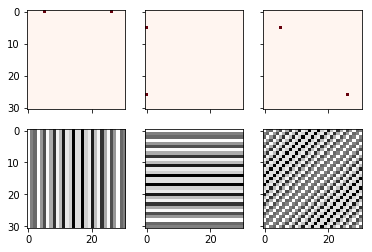

In [23]:
from scipy.fftpack import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm


N = 31
f, ((ax1, ax3, ax5), (ax2, ax4, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')


xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax2.imshow(np.abs(Z), cmap=cm.gray)

xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.abs(Z), cmap=cm.gray)

xf = np.zeros((N, N))
xf[5, 5] = 1
xf[N-5, N-5] = 1
Z = ifftn(xf)
ax5.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.abs(Z), cmap=cm.gray)



## Estádistica
La paquetería scipy.stats orientada a la estadistica nos ofrece un conjunto de funciones y herramientas para la estádistica en general. A continuación se nombrarán algunos métodos generales.

Para una lista de todas las funciones disponibles en la paquetería recomendamos revisar la documentación en el siguiente enlace:
https://docs.scipy.org/doc/scipy/reference/stats.html

### Funciones elementales
* Media
* Varianza
* Desviación Estandar

> norm.mean(),  norm.var(), norm.std()

$$ \bar{X}=\dfrac{ 1}{N}\Sigma_{i=0}^N{x_i}, \ \ \ \ \ \sigma^2_n=\dfrac{1}{n}{\Sigma_{i=0}^{N}{(x_i-\bar{X})^2}}, \ \ \ \ \ \sigma $$

In [24]:
from scipy.stats import norm #Importamos la distribución normal

print (norm.mean())
print(norm.var())
print(norm.std())

0.0
1.0
1.0



#### Repaso de propiedades estádisticas y distribución de probabilidad estandar 
---
Función de probabilidad de masa

$$p(x_k)=P[X=x_k] $$
$$f(x) = \sum_k \ {p(x_k)\delta (x-x_k)}$$

Función acumulativa

$$F(x)=P[X<x] $$

Función superviviente

$$S(x)=1-F(x)=P[X>x] $$

Inversa de la función acumulativa

$$ G(q)=F^{-1}(q) $$

Inversa de la superviviente

$$  Z(\alpha)=S^{-1}(\alpha)=G(1-\alpha)$$

Momentos Geneales

$$ \mu^{'}_m =\sum_k{x_k^m p(x_k)} $$
*Promedio*
$$\mu= \mu^{'}_1 =\sum_k{x_k p(x_k)}  $$
*Varianza*
$$\sigma = \mu^{'}_2 =\sum_{x_k}{x_k^2 p(x_k)} - \mu^2 $$
*Asimetria*
$$ \gamma_1 = \dfrac{\mu_3}{\mu_2^{3/2}} $$
*Kurtosis de fisher*
$$ \gamma_2 = \dfrac{\mu_4}{\mu_2^2}-3$$





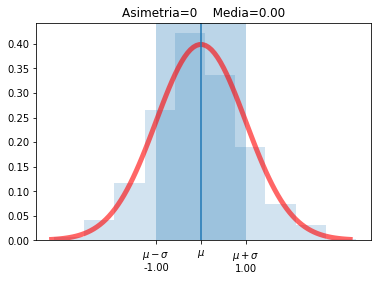

In [2]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# Parametro de asimetria
a = -0

mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
x = np.linspace(skewnorm.ppf(0.01, a)-1,
                 skewnorm.ppf(0.99, a)+1, 100)
ax.plot(x, skewnorm.pdf(x, a),
        'r-', lw=5, alpha=0.6, label='skewnorm pdf')

# Generar muestras aleatorias
r = skewnorm.rvs(a, size=1000)
ax.hist(r, density=True, bins=10,
        histtype='stepfilled', alpha=0.2)

title = 'Asimetria=' + str(a) + '    Media=' + "{0:.2f}".format(mean)
ax.axvline(x=mean)

desEst = np.sqrt(var)
ax.axvspan(xmin=mean-desEst, 
          xmax=mean+desEst,
          alpha=0.3)

plt.xticks([mean - desEst, mean, mean + desEst],
          ['$\mu-\sigma$ \n' + "{0:.2f}".format(mean - desEst),
           '$\mu$',
           '$\mu+\sigma$ \n' + "{0:.2f}".format(mean + desEst)])
plt.title(title)
plt.show()

## Distribuciones de Probabilidad

<img src='Class3D/distribution.png'>

### Distribuciones Discretas
---

Las distribuciones discretas parametrizan y describen  el comportamiento de eventos en los cuales se obtiene la probabilidad de observar en elemento predefinido perteneciente a un conjunto.

Ejemplo: Probabilidades de obtener un lado de una moneda, probabilidades de obtener un número al lanzar dados.

#### Todas las distribuciones de acontinuación poseen la siguiente lista de métodos
---
|Nombre|Escritura
|---|---
|Variables aleatorias | rvs(n, p, loc=0, size=1, random_state=None)	
|Función de probabilidad de masa| pmf(k, n, p, loc=0)	
|Logaritmo de pmf| logpmf(k, n, p, loc=0)	
|Función de distribución acumulativa| cdf(k, n, p, loc=0)	
|Logaritmo de cdf |logcdf(k, n, p, loc=0)	
|Función de supervivencia|sf(k, n, p, loc=0)	
|Logaritmo de sf|logsf(k, n, p, loc=0)	
|Inversa de sd | isf(q, n, p, loc=0)	
|Caracteristicas| stats(n, p, loc=0, moments=’mv’) 
|Retorna| Media, varianza, asimetria y kurtosis|
|Entropia|entropy(n, p, loc=0)	
|Mediana|median(n, p, loc=0)	
|Media  |mean(n, p, loc=0)	
|Varianza |var(n, p, loc=0)	
|Derivación Estandar| std(n, p, loc=0)	

Donde las expresiones
> k, q, n, p: son dependientes de cada una de las propiedades que calculamos

> loc=0: Es referente a la centralización o centro de la distribución 


#### Distribuciones a ver
* Bernoulli
* Binomial

Las siguentes distribuciones se encuentran presentes en la paquetería:
    * Bernoulli
    * Binomial
    * Boltzman
    * Plank
    * Poisson
    * Geometrica
    * Binomial Negativa
    * Hyper Geometrica
    * Zipf
    * Logaritmica
    * Distribución laplaciana discreta
    * Distribución discreta uniforme

##### Bernoulli
$$f(k)= \Bigg\{  \begin{array}{cc}  1-p \ si \ k=0 \\ p \ si \ k=1 \end{array}, donde \ k \in \{0,1\}$$

Valor medio:  0.3 
Varianza: 0.21 
Asimetria: 0.8728715609439698 
Kurtosis: -1.2380952380952375


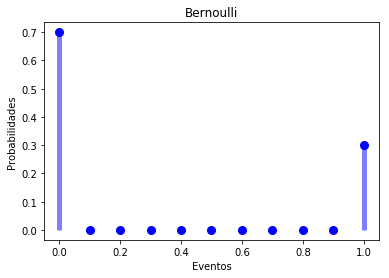

In [26]:
from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

p = 0.3
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')

print("Valor medio: ", mean,
      "\nVarianza:", var,
      "\nAsimetria:",skew,
      "\nKurtosis:",kurt)

x = np.arange(0,1.1,0.1)
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8)
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
plt.title("Bernoulli")
plt.xlabel("Eventos")
plt.ylabel("Probabilidades")

plt.show()


##### Binomial
$$f(k)=\binom{n}{k}p^k(1-p)^{n-k} , \  donde \ k \in \{0,1,2,3,...,n\}$$

Valor medio:  2.0 
Varianza: 1.0 
Asimetria: 0.0 
Kurtosis: -0.5


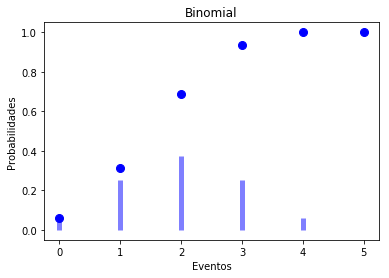

In [27]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n, p = 4, 0.5
mean, var, skew, kurt = binom.stats(n,p, moments='mvsk')

print("Valor medio: ", mean, "\nVarianza:", var,"\nAsimetria:",skew,"\nKurtosis:",kurt)

x = np.arange(0,5.1,1)
ax.plot(x, binom.cdf(x, n, p), 'bo', ms=8)
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.title("Binomial")
plt.xlabel("Eventos")
plt.ylabel("Probabilidades")

plt.show()

### Distribuciones Continuas
---

Las distribuciones continuas sirven para medir probabilidades sobre variables que pueden caer en un rango de valores dentro de los números reales.

Distribuciones a ver:
* Normal
* Beta

Las siguentes distribuciones se encuentran presentes en la paquetería:
    * Alpha 
    * Beta
    * Chi-cuadrada
    * Coseno
    * Exponencial
    * Hiperbólica
    * T-student
    * Gauss asimétrica
    * https://docs.scipy.org/doc/scipy-1.1.0/reference/tutorial/stats/continuous.html



##### Normal

$$f(x)=\frac{1}{\sqrt{2\pi\sigma}} * e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$


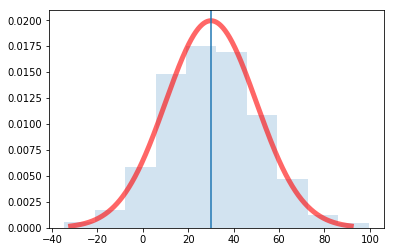

In [28]:
from scipy.stats import norm
import matplotlib.pyplot as plt

mean = 30
std = 20

x = np.linspace(norm.ppf(0.001, loc=mean, scale=std),
               norm.ppf(0.999, loc=mean, scale=std),
               1000)

# Genrar muestras aleatorias
r = norm.rvs(size=1000, loc=mean, scale=std)

plt.plot(x, norm.pdf(x, loc=mean, scale=std),
         'r-', lw=5, alpha=0.6,)
plt.hist(r, density=True, 
         histtype='stepfilled', alpha=0.2)

plt.axvline(x=mean)
plt.show()

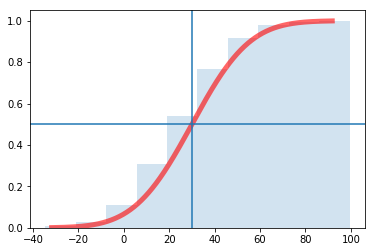

In [29]:
plt.plot(x, norm.cdf(x, loc=mean, scale=std),
         'r-', lw=5, alpha=0.6,)
plt.hist(r, density=True, histtype='stepfilled', 
         alpha=0.2, cumulative=True)
plt.axvline(x=mean)
plt.axhline(y=0.5)
plt.show()

##### Beta

$$f(x)=\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(a, b)}$$

$$B(\alpha, \beta) = \frac{\Gamma(\alpha) + \Gamma(\beta)}{\Gamma(\alpha+\beta)}$$

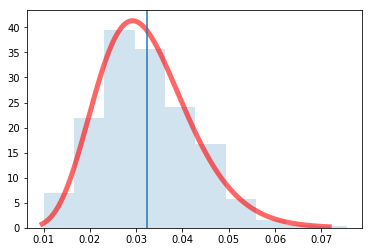

In [30]:
from scipy.stats import beta

a = 10
b = 300

mean = a/(a+b)

x = np.linspace(beta.ppf(0.001, a, b),
               beta.ppf(0.999, a, b),
               1000)

r = beta.rvs(a, b, size=1000)

plt.plot(x, beta.pdf(x, a, b),
         'r-', lw=5, alpha=0.6,)
plt.hist(r, density=True, 
         histtype='stepfilled', alpha=0.2)

plt.axvline(x=mean)
plt.show()

## Pruebas estadísticas
Un factor importante a considerar en una investigación es la validez estadística que esta posee, esta está determinada por las muestras y las diferencias que presenten los fenómenos a estudiar.

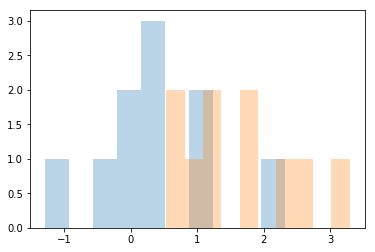

In [31]:
# Generar dos funciones normales

puntos = 10
media1 = 0.1
media2 = 2

des1 = 0.3
des2 = 0.2

x1 = norm.rvs(size=puntos, loc=media1)
x2 = norm.rvs(size=puntos, loc=media2)
plt.hist(x1,
        alpha=0.3)
plt.hist(x2,
         alpha=0.3)
plt.show()

In [32]:
# Prueba de t-student
from scipy.stats import ttest_ind

statistics, pvalue = ttest_ind(x1, x2, equal_var=False)
print("El valor t de la prueba fue de: ", statistics)
print("El valor p de la prueba fue de: ", pvalue)

El valor t de la prueba fue de:  -3.0120456902660195
El valor p de la prueba fue de:  0.007499190205357575


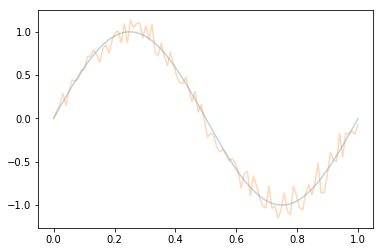

In [33]:
# Prueba r de Pearson
puntos = 100
t = np.linspace(0, 1, puntos)
x = np.sin(2 * np.pi *t)
y = 1*x + np.random.randn(puntos)/10
plt.plot(t, x,
         alpha=0.3)
plt.plot(t, y,
         alpha=0.3)



In [34]:
from scipy.stats import pearsonr

r, pvalue = pearsonr(x, y)
print("El valor r de la prueba fue de: ", r)
print("El valor p de la prueba fue de: ", pvalue)

El valor r de la prueba fue de:  0.9907771279827335
El valor p de la prueba fue de:  6.913761418121072e-87


In [35]:
x = (np.random.randn(100)) * 4 + 2

mean, std = norm.fit(x)
print(mean)
print(std)

1.8438705594393756
3.925685512760138


## Pandas

Pandas es una librería desarrollada para dar funcionalidades de manipulación de datos a Python. Está basado en las funciones de __R__ para procesamiento de datos.

In [4]:
from __future__ import print_function
import numpy as np
import pandas as pd

### Características
* Objetos eficientes para manipulación de datos
    * Serie
    * DataFrame
* Herramientas para lectura de archivos
* Alineación de datos y manejo de datos faltantes
* Múltiples de tipos de variables
    * Objeto
    * Int
    * Float
    * Bool
    * datetime64
    * timedelta
    * Categoría
* Graficación
    * Histograma
    * Dispersión
    * Línea
    * Pie
    * Caja

In [37]:
df = pd.DataFrame((np.random.randn(1000, 4)) * np.array([1, 2, 0.5, 0.1]) + np.array([1, 3, 5, 7]),
                  columns=['A', 'B', 'C', 'D'])

In [38]:
### Funciones para referencia

In [39]:
df.head()

,A,B,C,D
0,1.391914,3.896916,3.785902,6.833899
1,1.307610,2.773648,5.250957,6.966325
2,-0.464317,5.008186,4.993072,6.918407
3,0.118687,2.174365,5.252889,6.893010
4,0.607286,4.626057,5.102175,6.919140


In [40]:
df.describe()

,A,B,C,D
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.034992,2.981115,4.988161,7.002831
std,0.948007,2.077195,0.520140,0.098977
min,-2.565856,-4.940393,3.100278,6.684727
25%,0.389588,1.587311,4.659565,6.934841
50%,1.039787,3.006027,5.006230,7.000341
75%,1.670472,4.364833,5.343449,7.068406
max,4.172414,9.387341,6.690084,7.310062


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
A    1000 non-null float64
B    1000 non-null float64
C    1000 non-null float64
D    1000 non-null float64
dtypes: float64(4)
memory usage: 31.3 KB


### Manipulación de datos

In [42]:
# Accesar a las columnas
print(df['A'])

0      1.391914
1      1.307610
2     -0.464317
3      0.118687
4      0.607286
5      2.270341
6      1.862063
7      1.938070
8      2.514753
9     -0.055221
10     1.048089
11     1.148854
12     0.418882
13     1.076269
14     2.021036
15     2.704908
16    -0.372031
17     2.500535
18     1.580853
19     1.197616
20    -0.353951
21     0.626001
22     0.600777
23     1.672315
24     0.604870
25     1.920333
26     0.199252
27     1.747131
28     1.282641
29     2.051388
         ...   
970   -0.333260
971    0.040200
972    0.282175
973    0.886185
974    1.684969
975    1.412670
976    1.019947
977    2.275710
978    0.006516
979    0.711116
980    0.765118
981    1.270644
982    0.968066
983    1.838697
984    0.980418
985    0.177764
986    1.342532
987    2.672926
988    0.506485
989    0.560699
990    1.019030
991    1.451671
992   -0.528584
993    1.029950
994    2.255559
995    1.375879
996    2.343658
997    0.186266
998    2.450090
999    1.571304
Name: A, Length: 1000, d

In [43]:
print(df.A)

0      1.391914
1      1.307610
2     -0.464317
3      0.118687
4      0.607286
5      2.270341
6      1.862063
7      1.938070
8      2.514753
9     -0.055221
10     1.048089
11     1.148854
12     0.418882
13     1.076269
14     2.021036
15     2.704908
16    -0.372031
17     2.500535
18     1.580853
19     1.197616
20    -0.353951
21     0.626001
22     0.600777
23     1.672315
24     0.604870
25     1.920333
26     0.199252
27     1.747131
28     1.282641
29     2.051388
         ...   
970   -0.333260
971    0.040200
972    0.282175
973    0.886185
974    1.684969
975    1.412670
976    1.019947
977    2.275710
978    0.006516
979    0.711116
980    0.765118
981    1.270644
982    0.968066
983    1.838697
984    0.980418
985    0.177764
986    1.342532
987    2.672926
988    0.506485
989    0.560699
990    1.019030
991    1.451671
992   -0.528584
993    1.029950
994    2.255559
995    1.375879
996    2.343658
997    0.186266
998    2.450090
999    1.571304
Name: A, Length: 1000, d

In [44]:
# Comparaciones
print(df.A<0.5)

0      False
1      False
2       True
3       True
4      False
5      False
6      False
7      False
8      False
9       True
10     False
11     False
12      True
13     False
14     False
15     False
16      True
17     False
18     False
19     False
20      True
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28     False
29     False
       ...  
970     True
971     True
972     True
973    False
974    False
975    False
976    False
977    False
978     True
979    False
980    False
981    False
982    False
983    False
984    False
985     True
986    False
987    False
988    False
989    False
990    False
991    False
992     True
993    False
994    False
995    False
996    False
997     True
998    False
999    False
Name: A, Length: 1000, dtype: bool


In [45]:
# Función loc
df.loc[2:6, ['A', 'C']]

,A,C
2,-0.464317,4.993072
3,0.118687,5.252889
4,0.607286,5.102175
5,2.270341,5.093484
6,1.862063,4.958147


In [46]:
# Combinando funciones de manejo
subset = df.loc[df['A']<0.1, ['A', 'B']]
subset.describe()

,A,B
count,166.000000,166.000000
mean,-0.376059,3.173968
std,0.419878,2.119328
min,-2.565856,-1.820387
25%,-0.615769,1.588415
50%,-0.254092,3.206500
75%,-0.063688,4.657976
max,0.094042,8.597861


In [47]:
# Usando query
query1 = df.query('A<0.1 | B<0.2')
query1.describe()

,A,B,C,D
count,251.000000,251.000000,251.000000,251.000000
mean,0.207337,1.891965,5.019834,7.007004
std,1.009792,2.539694,0.506468,0.099239
min,-2.565856,-4.940393,3.100278,6.738346
25%,-0.431092,-0.108201,4.667022,6.937423
50%,-0.059603,1.573587,5.042289,7.003644
75%,0.706443,3.800682,5.338695,7.070567
max,3.557114,8.597861,6.339227,7.310062


In [48]:
# Obtener un array de numpy
print(df.query('A<0.1 & B<0.2').as_matrix())

[[-6.40563562e-01 -1.01879100e+00  5.29919324e+00  7.02703229e+00]
 [-4.99737641e-01 -9.73650277e-01  4.87018160e+00  6.98445877e+00]
 [-6.83701089e-01  1.71703110e-01  4.24055115e+00  7.15248076e+00]
 [-8.09907726e-02 -1.82038681e+00  5.14199843e+00  7.01763724e+00]
 [-2.40447581e-01 -7.45398004e-02  4.43645353e+00  7.10321762e+00]
 [ 6.37893619e-02 -8.12925812e-02  5.20462214e+00  6.92526163e+00]
 [-7.56377537e-02 -4.83092022e-01  4.84968256e+00  6.93949336e+00]
 [ 5.72203715e-02 -1.07842601e+00  4.80928875e+00  6.97614864e+00]
 [-1.57708392e-01 -4.52050900e-01  5.69303632e+00  6.95677561e+00]
 [ 7.65077724e-02 -1.30046868e-01  5.11026360e+00  6.83595521e+00]
 [-5.34562250e-01 -7.87124556e-01  4.50504758e+00  6.91735469e+00]
 [ 9.40423258e-02 -2.92135416e-01  5.16125358e+00  6.97357906e+00]
 [-5.96804413e-01 -3.94582021e-03  3.58321389e+00  6.99559580e+00]
 [-3.59515658e-01 -6.62606688e-01  5.34735595e+00  7.10528445e+00]]


C:\Users\DAYOF\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [49]:
# Funciones estadísticas
print("Media de la columna A: ", df.A.mean())
print("Desviación estándar de la columna A: ", df.A.std())
print("Asimetría de la columna A: ", df.A.skew())
print("Kurtosis de la columna A: ", df.A.kurt())
print("Media de cada columna: \n", df.mean())

Media de la columna A:  1.0349923796139888
Desviación estándar de la columna A:  0.9480068685231093
Asimetría de la columna A:  0.017071440254324995
Kurtosis de la columna A:  -0.02096330134514668
Media de cada columna: 
 A    1.034992
B    2.981115
C    4.988161
D    7.002831
dtype: float64


# Lectura de datos
Pandas permite la lectura de archivos csv, xlsx, txt, hdf5, entre otros.
Para los ejemplos siguentes se usará el dataset _Iris_ (disponible en https://www.kaggle.com/jchen2186/machine-learning-with-iris-dataset)

## Datset titanic

El dataset de titanic muestra información sobre pasajeros de los cuales se tiene conocimiento de si sobrevivieron al accidente junto con datos personales. Algunos de estos datos sin embargo, son desconocidos para algunos pasajeros.


In [5]:
titanic = pd.read_csv('data/titanic-train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
titanic.loc[titanic['Sex']=='male', ['Name']].head()

,Name
0,"Braund, Mr. Owen Harris"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"


In [52]:
ordenado = titanic.sort_values('Age', ascending=False)
ordenado.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [53]:
# Función unique
print("Valores posibles para la clase del pasajero: ", titanic['Pclass'].unique())
print("Valores posibles para el género del pasajero: ", titanic['Sex'].unique())

Valores posibles para la clase del pasajero:  [3 1 2]
Valores posibles para el género del pasajero:  ['male' 'female']


In [54]:
print("Resumen de sobrevivientes: \n", titanic['Survived'].value_counts())

Resumen de sobrevivientes: 
 0    549
1    342
Name: Survived, dtype: int64


In [55]:
# Función de groupby
titanic.groupby(['Pclass', 'Survived'])['PassengerId'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

In [56]:
titanic.pivot_table(index='Pclass',
                   columns='Survived',
                   values='PassengerId',
                   aggfunc='count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


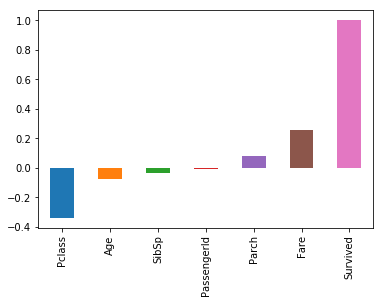

In [57]:
# Correlación
corr_sobrevivir = titanic.corr()['Survived'].sort_values()
corr_sobrevivir.plot.bar()

### Funciones visualización

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

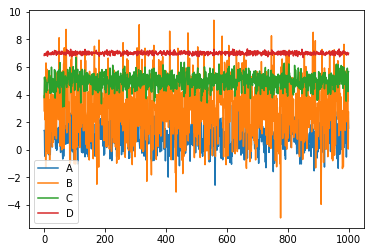

In [59]:
df.plot(subplots=False)

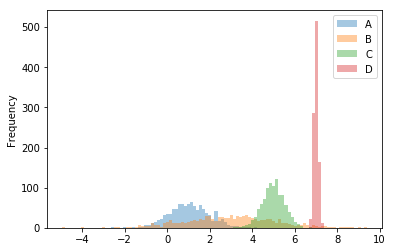

In [60]:
df.plot.hist(alpha=0.4,
            bins=100)

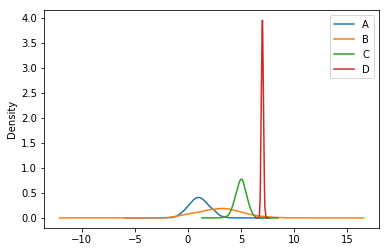

In [61]:
df.plot.kde()

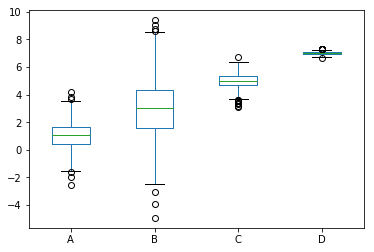

In [62]:
df.plot.box()

## Dataset Iris

El dataset Iris contiene información sobre medidas de diversas flores. Es muy usado para ejemplificar modelos de clasificación y agrupamiento.

In [6]:
iris = pd.read_csv('Data/Iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [64]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


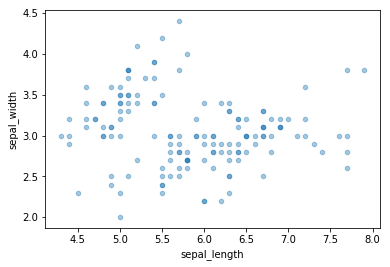

In [66]:
iris.plot.scatter(x='sepal_length', y='sepal_width',
               alpha=0.4)

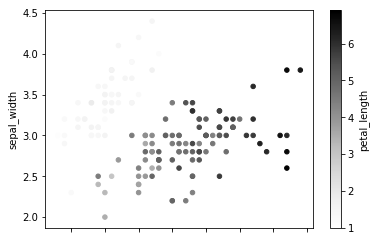

In [67]:
iris.plot.scatter(x='sepal_length', y='sepal_width',
                c='petal_length')

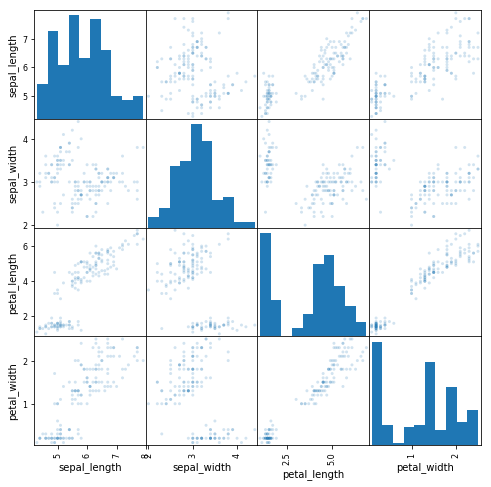

In [68]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, alpha=0.2, figsize=(8, 8), diagonal='hist')
plt.show()

## ggplot

ggplot es una librería usada ampliamente para análisis de datos. Está basado en las reglas para visualizar información a través de gráficas en _The Grammar of Graphics_ https://www.springer.com/us/book/9780387245447

Las gráficas de ggplot incorporan dos elementos principales:

* aesthetics: Mapea los valores a características de la gráfica como ejes, colores, tamaño, etc.
* geoms: Selecciona cuáles gráficas se generan con los datos, es posible sobreponerlas y modificarlas individualmente. Se añaden usando el símbolo de suma "+".

Diversas implementaciones de ggplot han sido desarrolladas para Python.

### Plotnine

Implementación de ggplot2 en Python. Funciona con los mismos comandos que ggplot2 en R para facilitar la transición entre lenguajes.

conda install -c conda-forge plotnine   
pip3 install plotnine

pip3 install ggplot


#### Actualización de pip
python -m pip install --upgrade pip

In [7]:
from plotnine import *
#from plotnine import *

c:\python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


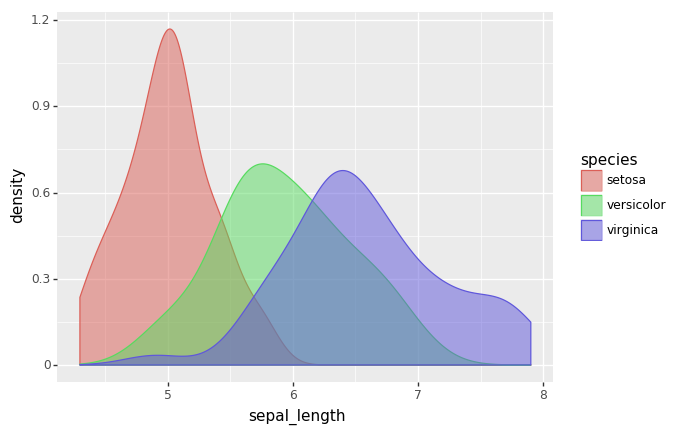

<ggplot: (-9223371874505253951)>

In [8]:
p = ggplot(aes(x='sepal_length',
              color='species',
              fill='species'), data=iris) + geom_density(alpha=0.5)# + geom_dotplot(bins=25, alpha=0.5)
p

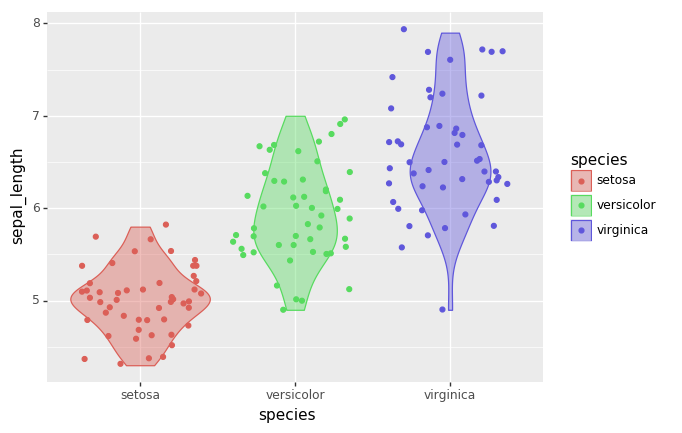

<ggplot: (-9223371874507766191)>

In [9]:
p = ggplot(aes(x='species', 
               y = 'sepal_length',
               color='species',
              fill='species'), data=iris) + geom_jitter() +  geom_violin(alpha=0.4)
p

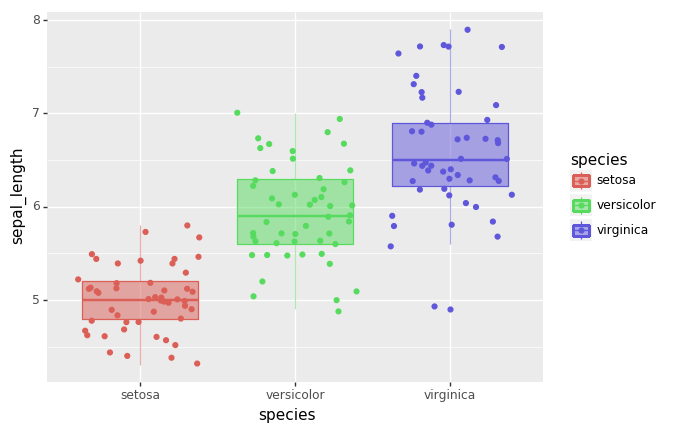

<ggplot: (162349647350)>

In [10]:
p = ggplot(aes(x='species', 
               y = 'sepal_length',
               color='species',
               fill='species'), data=iris) +  geom_boxplot(alpha=0.5) + geom_jitter()
p

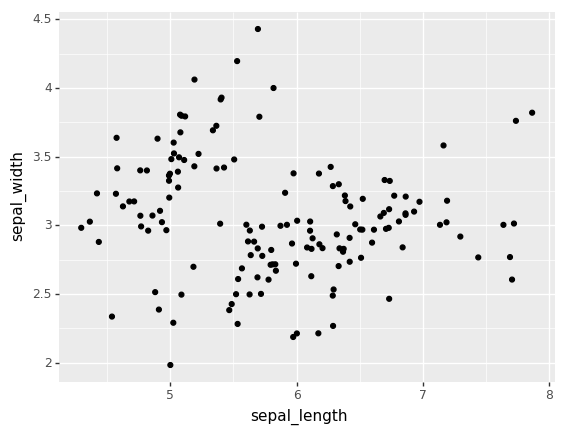

<ggplot: (-9223371874505248014)>

In [11]:
ggplot(aes(x='sepal_length', y='sepal_width'), data=iris) + geom_jitter()


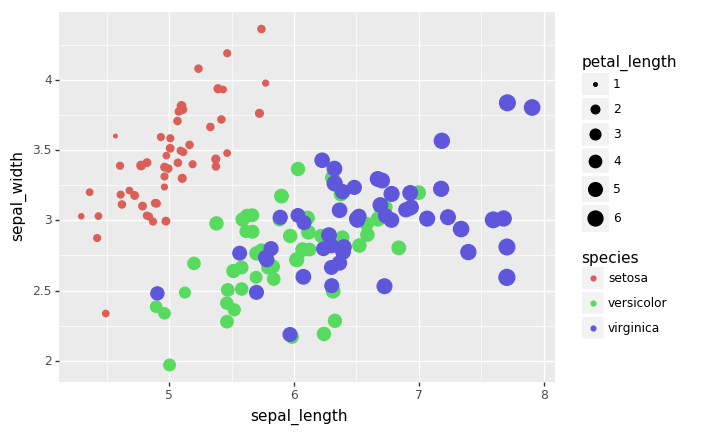

<ggplot: (-9223371874505072219)>

In [12]:
ggplot(aes(x='sepal_length', y='sepal_width', 
           color='species', size='petal_length'), 
           data=iris) + geom_jitter()

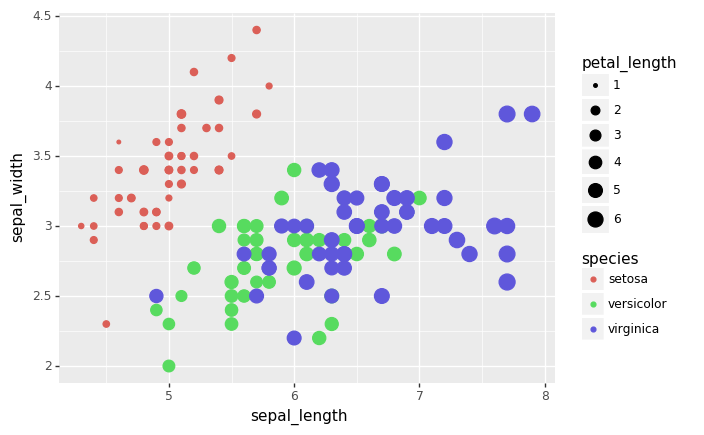

<ggplot: (-9223371874503727279)>

In [13]:
ggplot(aes(x='sepal_length', y='sepal_width', 
           color='species', size='petal_length'), 
           data=iris) + geom_point()

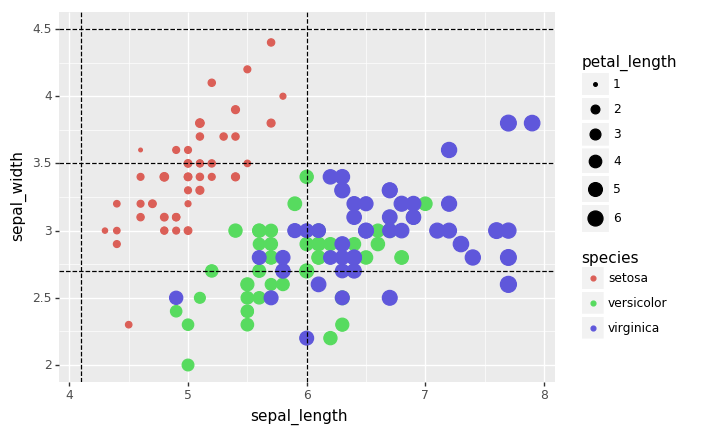

<ggplot: (-9223371874503751294)>

In [14]:
ggplot(aes(x='sepal_length', y='sepal_width', 
           color='species', size='petal_length'), 
           data=iris) + geom_point() + \
           geom_hline(yintercept=[2.7, 4.5, 3.5], linetype='dashed') + \
           geom_vline(xintercept=[4.1, 6], linetype='dashed')

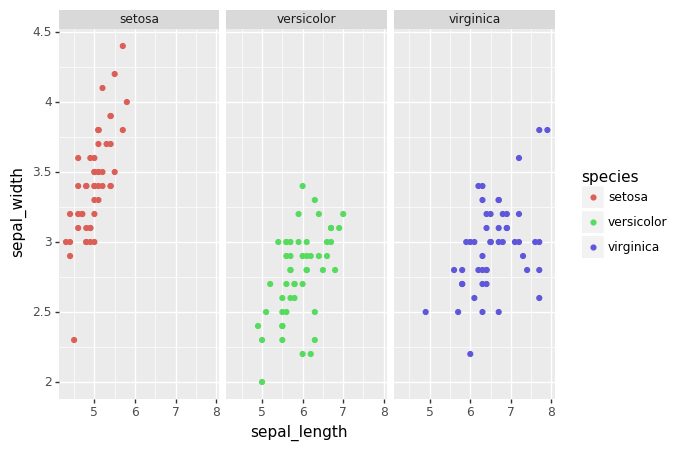

<ggplot: (162351073200)>

In [15]:
ggplot(aes(x='sepal_length', y='sepal_width', 
           color='species'), 
           data=iris) + geom_point() + facet_wrap('species')

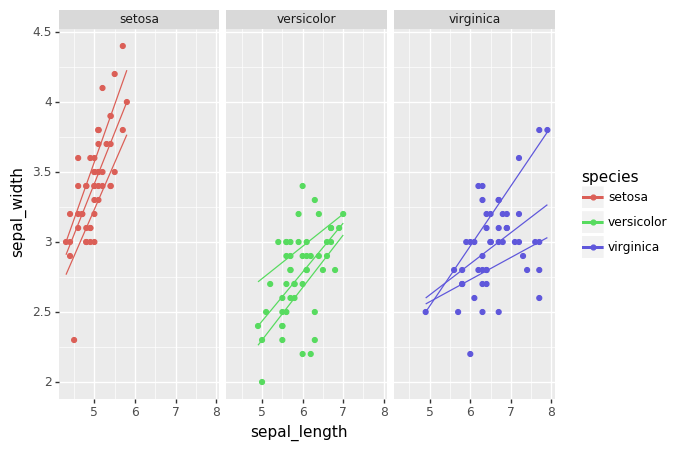

<ggplot: (162351114949)>

In [16]:
ggplot(aes(x='sepal_length', y='sepal_width', 
           color='species'), 
           data=iris) + geom_point() + facet_wrap('species') + geom_quantile()

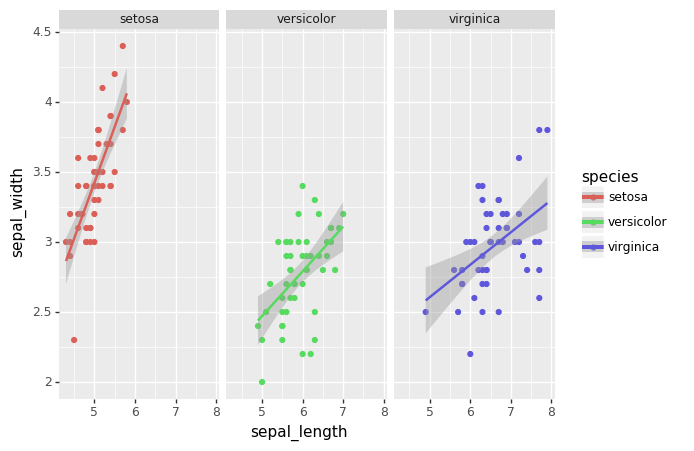

<ggplot: (162351100266)>

In [17]:
ggplot(aes(x='sepal_length', y='sepal_width', 
           color='species'), 
           data=iris) + geom_point() \
            + facet_wrap('species') \
            + geom_smooth(method='lm')

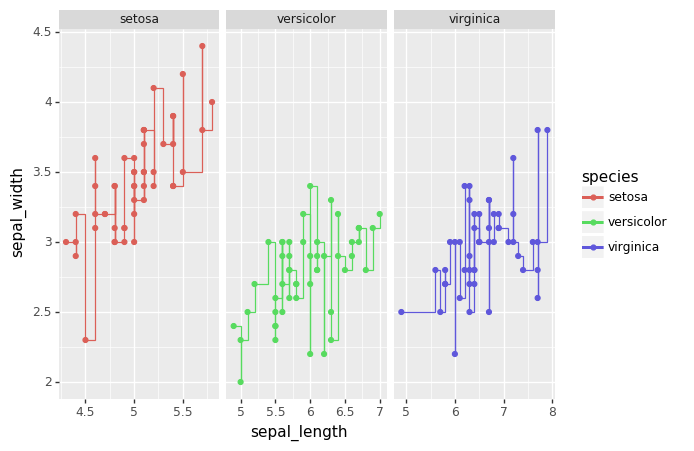

<ggplot: (-9223371874503718221)>

In [18]:
ggplot(aes(x='sepal_length',
           y='sepal_width', 
           color='species'), 
           data=iris) + geom_point() \
            + facet_wrap('species', scales='free_x') \
            + geom_step()

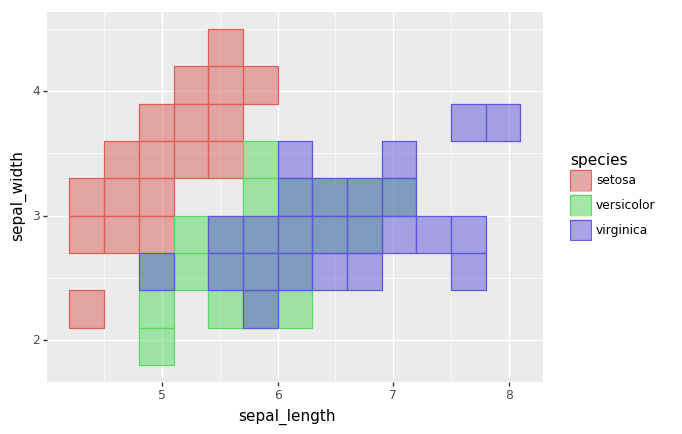

<ggplot: (-9223371874505172676)>

In [19]:
ggplot(aes(x='sepal_length', y='sepal_width', 
           color='species', fill='species'), 
           data=iris) + geom_bin2d(alpha=0.5, binwidth = (0.3, 0.3))

In [20]:
trade = pd.read_csv('data/cansim.csv', skiprows=6,
                 skipfooter=10)
trade.Adjustments = pd.to_datetime(trade.Adjustments,  errors='coerce')
trade.head()

c:\python36\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Adjustments,Unadjusted,Seasonally adjusted
0,1991-01-01,12588862,15026890
1,1991-02-01,12154321,15304585
2,1991-03-01,14337072,15413591
3,1991-04-01,15108570,15293409
4,1991-05-01,17225734,15676083


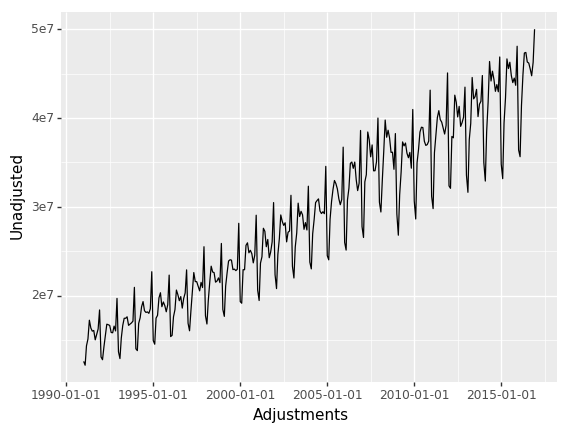

<ggplot: (162349594667)>

In [21]:
ggplot(aes(x='Adjustments',
           y='Unadjusted'), data=trade) + geom_line()

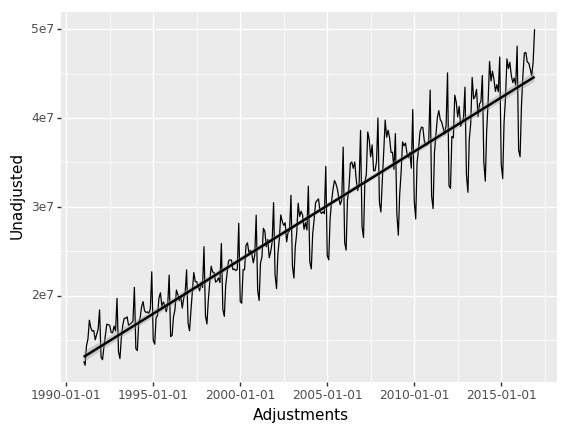

<ggplot: (-9223371874503843177)>

In [22]:
ggplot(aes(x='Adjustments', y='Unadjusted'), data=trade) + geom_line() \
    + geom_smooth(method='lm', level=0.9)

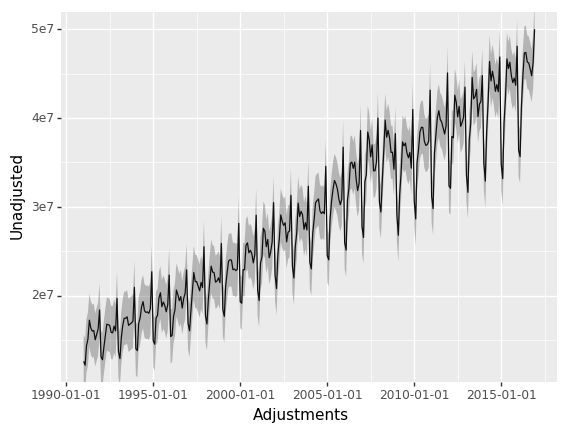

<ggplot: (162349776381)>

In [23]:
ggplot(aes(x='Adjustments', y='Unadjusted'), data=trade) + geom_line() \
    + geom_ribbon(alpha=0.3, ymax=trade.Unadjusted+3e6, ymin=trade.Unadjusted-3e6)

In [24]:
trade2 = pd.melt(trade, id_vars='Adjustments')
trade2.head()

,Adjustments,variable,value
0,1991-01-01,Unadjusted,12588862
1,1991-02-01,Unadjusted,12154321
2,1991-03-01,Unadjusted,14337072
3,1991-04-01,Unadjusted,15108570
4,1991-05-01,Unadjusted,17225734


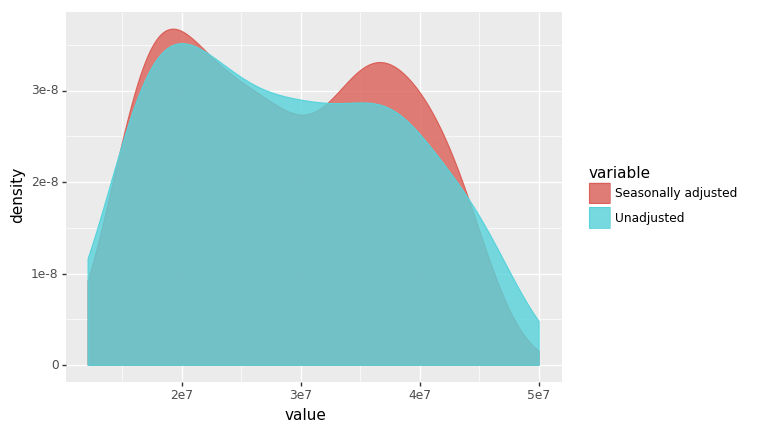

<ggplot: (162350972378)>

In [25]:
ggplot(aes(x='value', color='variable', fill='variable'), data=trade2) \
    + geom_density(alpha=0.8)

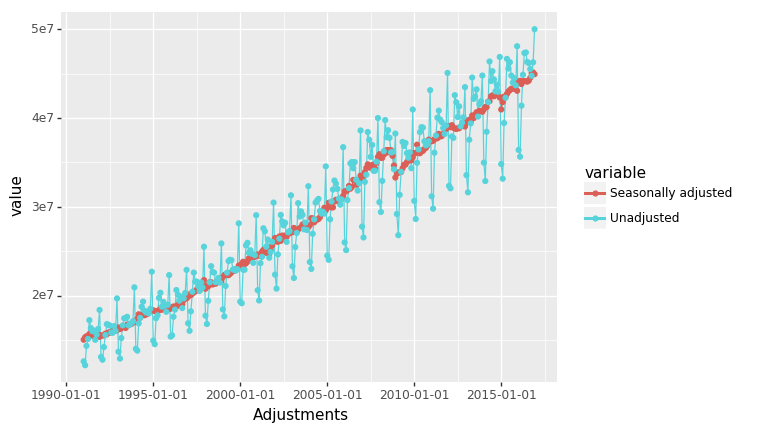

<ggplot: (-9223371874503741089)>

In [26]:
ggplot(aes(x='Adjustments', y='value', color='variable'), data=trade2) \
    + geom_line() + geom_point()

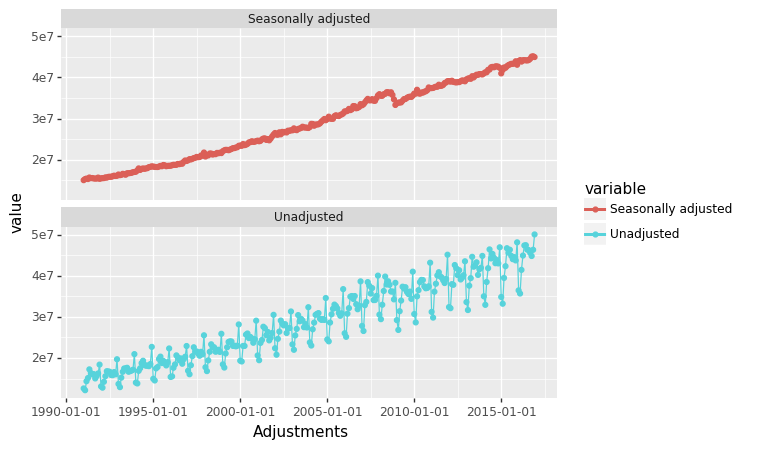

<ggplot: (-9223371874504988086)>

In [27]:
ggplot(aes(x='Adjustments', y='value', color='variable'), data=trade2) \
    + geom_line() + geom_point() + facet_wrap('variable', nrow=2, ncol=1)

In [28]:
air = pd.read_csv('data/international-airline-passengers.csv')
air.Month = pd.to_datetime(air.Month)
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                  144 non-null datetime64[ns]
Thousand Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


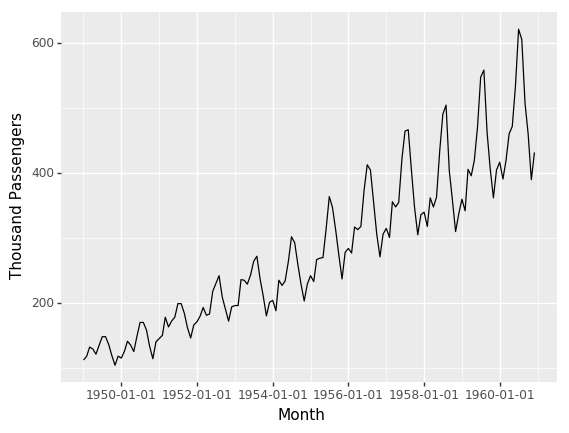

<ggplot: (-9223371874503821873)>

In [29]:
ggplot(aes(x='Month', y='Thousand Passengers'), data=air) + geom_line()

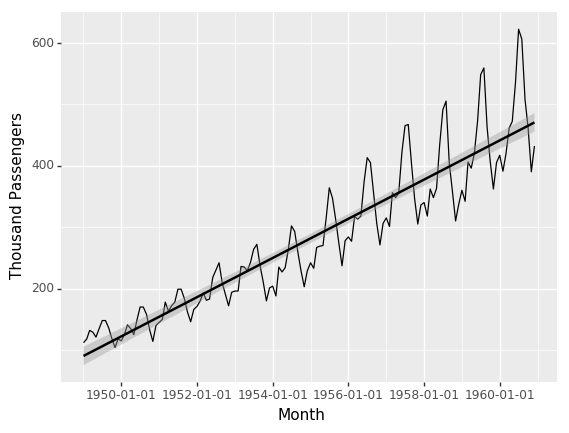

<ggplot: (-9223371874503853957)>

In [30]:
ggplot(aes(x='Month', y='Thousand Passengers'), data=air) + geom_line() \
    + geom_smooth(method='lm')

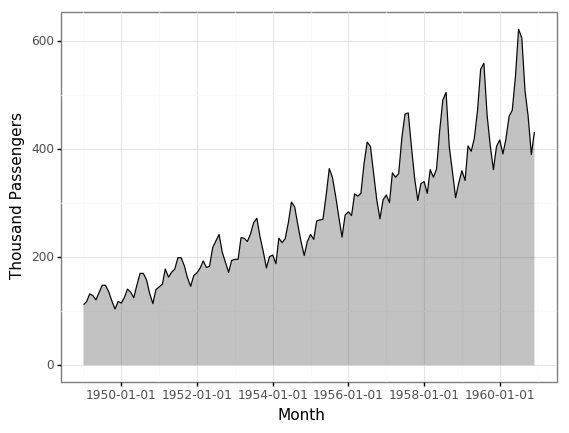

<ggplot: (-9223371874503796876)>

In [31]:
ggplot(aes(x='Month', y='Thousand Passengers'), data=air) + geom_line() \
    + geom_area(alpha=0.3) + theme_bw()

## Ejercicios
* Abrir el dataset de peso y altura 'data/weight_height' y mostrar su información relevante.
* Mostrar el histograma(ggplot) para cada uno de los valores de peso y altura.
* Obtener el histograma(ggplot) de altura para cada género usando comandos de pandas.
* Usando los datos de peso ajustar una distribución normal y obtener sus parámetros.
* Mostrar la distribución cumulativa para la distribución resultante para un rango de valores a elegir.
* Mostrar la correlación entre las variables.
* Hacer una pivot table para el dataset de titanic usando como criterio el género del pasajero.
* Hacer una prueba estadística para verificar si el género influye en la supervivencia.